In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.random.normal(10,2, 100)
y = x**4 + np.random.normal(1500, 1500, 100)

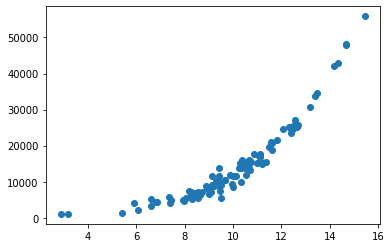

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_generator = PolynomialFeatures(degree=4)

In [6]:
x_new = poly_generator.fit_transform(x.reshape(-1, 1))

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(x_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg.predict(x_new)

In [11]:
y_pred.shape

(100,)

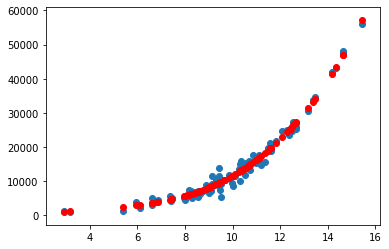

In [12]:
plt.scatter(x, y)
plt.scatter(x, y_pred, c='r')
plt.show()

In [13]:
reg.intercept_

-3274.117062241392

In [14]:
reg.coef_.astype(int)

array([   0, 2441, -433,   32,    0])

In [15]:
from sklearn.datasets import load_boston

In [16]:
boston_data = load_boston()

In [17]:
X = boston_data.data

In [18]:
y = boston_data.target

In [19]:
df = pd.DataFrame(X, columns=boston_data.feature_names)

In [20]:
df["price"] = y

In [21]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = StandardScaler().fit_transform(X)

In [25]:
names = ["Linear", "Lasso", "Ridge"]
models = [LinearRegression(), LassoCV(), RidgeCV()]

In [26]:
for name, model in zip(names, models):
    print(f"*****{name}******")
    model.fit(X, y)
    print(f"Coefficients: {model.coef_}")
    print(f"Important Features: {(model.coef_ ** 2).argsort()[::-1]}")
    print("\n")

*****Linear******
Coefficients: [-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]
Important Features: [12  7  5  8  9 10  4  1  0 11  3  2  6]


*****Lasso******
Coefficients: [-0.46536551  0.49862271 -0.07400274  0.6433277  -1.30758222  2.9109174
 -0.         -2.03160307  0.37204988 -0.15577827 -1.84603018  0.7126043
 -3.71977274]
Important Features: [12  5  7 10  4 11  3  1  0  8  9  2  6]


*****Ridge******
Coefficients: [-0.91987132  1.06646104  0.11738487  0.68512693 -2.02901013  2.68275376
  0.01315848 -3.07733968  2.59153764 -2.0105579  -2.05238455  0.84884839
 -3.73066646]
Important Features: [12  7  5  8 10  4  9  1  0 11  3  2  6]


